In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
data = pd.read_csv('NSDUH_2022_Tab.txt', sep="\t", low_memory=False)

In [3]:
data.head()

,QUESTID2,FILEDATE,ANALWT2_C,VESTR_C,VEREP,PDEN10,COUTYP4,MAIIN102,AIIND102,AGE3,...,COSUTELE2,COSUAPTDL2,COSURXDL2,COSUSVHLT2,COHCTELE2,COHCAPTDL2,COHCRXDL2,COHCSVHLT2,LANGVER,GQTYPE2
0,10000330,10/19/2023,298.004021,40030,2,1,1,2,2,6,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2,NaN
1,10000425,10/19/2023,2292.377696,40002,1,2,2,2,2,9,...,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,1,NaN
2,10002771,10/19/2023,216.604339,40041,2,1,1,2,2,6,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1,NaN
3,10005250,10/19/2023,13828.218374,40012,2,2,1,2,2,7,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,NaN
4,10005432,10/19/2023,6282.612060,40037,1,2,2,2,2,10,...,3.0,3.0,3.0,3.0,2.0,1.0,2.0,2.0,1,NaN


In [4]:
data.shape

(50510, 2605)

Cleaning, mapping data

In [5]:
# selecting demographical columns
Xy_columns = ['PDEN10','COUTYP4','MAIIN102','AGE3','SERVICE','MOVSINPYR2','SEXIDENT','SPEAKENGL','LVLDIFSEE2','LVLDIFHEAR2','LVLDIFWALK2','LVLDIFMEM2','LVLDIFCARE2','LVLDIFCOMM2','IRSEX','IRMARIT','IREDUHIGHST2','NEWRACE2','HEALTH2','EDUSCHLGO','MILTFAMLY','IRWRKSTAT','IRHHSIZ2','IRKI17_2','IRHH65_2','IRINSUR4','IRPINC3','IRFAMIN3','GOVTPROG','POVERTY3','BOOKED','IRCIGRC','IRNICVAPREC','IRALCRC','IRCBDHMPREC','IRMJRC','IRCIGFM','IRNICVAP30N','IRALCFM','IRMJFM','PREG2','BMI2','COCLNEGMH','SMIPPPY','SMIPY','MICATPY']
Xy = data.loc[:,Xy_columns]
# checking data types
Xy.dtypes

PDEN10            int64
COUTYP4           int64
MAIIN102          int64
AGE3              int64
SERVICE           int64
MOVSINPYR2        int64
SEXIDENT          int64
SPEAKENGL         int64
LVLDIFSEE2        int64
LVLDIFHEAR2       int64
LVLDIFWALK2       int64
LVLDIFMEM2        int64
LVLDIFCARE2       int64
LVLDIFCOMM2       int64
IRSEX             int64
IRMARIT           int64
IREDUHIGHST2      int64
NEWRACE2          int64
HEALTH2         float64
EDUSCHLGO         int64
MILTFAMLY         int64
IRWRKSTAT         int64
IRHHSIZ2          int64
IRKI17_2          int64
IRHH65_2          int64
IRINSUR4          int64
IRPINC3           int64
IRFAMIN3          int64
GOVTPROG          int64
POVERTY3        float64
BOOKED            int64
IRCIGRC           int64
IRNICVAPREC       int64
IRALCRC           int64
IRCBDHMPREC       int64
IRMJRC            int64
IRCIGFM         float64
IRNICVAP30N     float64
IRALCFM         float64
IRMJFM          float64
PREG2           float64
BMI2            

In [6]:
# selecting adults only (age group >= 4)
Xy_adult = Xy[Xy['AGE3']>=4]
columns = Xy_adult.columns
# printing columns with null values and how many of them
for column in columns:
    null_count = Xy_adult[column].isna().sum()
    if sum(Xy_adult[column].isna()) > 0:
        print(f'{column} column has {null_count} null values')

HEALTH2 column has 5 null values
POVERTY3 column has 20 null values
PREG2 column has 306 null values
BMI2 column has 1714 null values
COCLNEGMH column has 1432 null values


In [7]:
# check new shape after removal of non-adults
Xy_adult.shape

(40216, 46)

Reasonable number of null rows - drop them

In [8]:
# drop rows with nan 
Xy_adult2 = Xy_adult.dropna()
# check new shape after removal of nulls
Xy_adult2.shape

(37803, 46)

Removing bad data according to NSDUH codebook

In [9]:
categorical = ['PDEN10','COUTYP4','MAIIN102','AGE3','SERVICE','MOVSINPYR2','SEXIDENT','SPEAKENGL','LVLDIFSEE2','LVLDIFHEAR2','LVLDIFWALK2','LVLDIFMEM2','LVLDIFCARE2','LVLDIFCOMM2','IRSEX','IRMARIT','IREDUHIGHST2','NEWRACE2','HEALTH2','EDUSCHLGO','MILTFAMLY','IRWRKSTAT','IRHHSIZ2','IRKI17_2','IRHH65_2','IRINSUR4','IRPINC3','IRFAMIN3','GOVTPROG','POVERTY3','BOOKED','PREG2','COCLNEGMH']
categorical_9 = ['IRCIGRC','IRNICVAPREC','IRALCRC','IRCBDHMPREC','IRMJRC']
categorical_80 = ['IRCIGFM','IRNICVAP30N','IRALCFM','IRMJFM']
numerical = ['BMI2']

# remove values greater than 80 for columns in categorical i.e. bad data, don't know, etc.
Xy_adult3 = Xy_adult2.copy()
for col in categorical:
    Xy_adult3 = Xy_adult3[Xy_adult3[col] < 80]

# map NEVER USED to 0 from 9 for all columns in categorical_9
for col in categorical_9:
    Xy_adult3[col] = Xy_adult3[col].replace({9:0})

# map EDUSKPMON=30 to 3 in EDUSCHLGO
Xy_adult3['EDUSCHLGO'] = Xy_adult3['EDUSCHLGO'].replace({11:3})

# categorize the drug use frequency: 
def drug_use_freq(val):
    # NEVER USED
    if val == 91:
        return -1
    # DID NOT USE PAST MONTH
    elif val == 93:
        return 0
    # light user
    elif 1 <= val <= 5:
        return 1
    # moderate user
    elif 6 <= val <= 15:
        return 2
    # heavy user
    else:
        return 3

# for categorical_80, apply the function above
for col in categorical_80:
    Xy_adult3[col] = Xy_adult3[col].apply(drug_use_freq)

# logit transform SMIPPPY (since SMIPPPY is a probability between 0 and 1)
def logit(val):
    return np.log(val/(1-val))

Xy_adult3['SMIPPPY'] = Xy_adult3['SMIPPPY'].apply(logit)

In [10]:
# check new shape 
Xy_adult3.shape

(36665, 46)

In [11]:
# output finalized data
#Xy_adult3.to_csv('data.csv', index=False)

Checking values and distributions (refer to distributions.ipynb)

More data prepping

In [12]:
data = pd.read_csv('data.csv')
data.drop(columns=['PDEN10'], inplace=True)

In [13]:
n_obs = data.shape[0]
columns = data.columns

# split into predictor and response variables
X = data.iloc[:, :-3]
y_smipppy = data.iloc[:,-3]
y_smipy = data.iloc[:,-2]
y_micatpy =data.iloc[:,-1]

In [14]:
# convert categorical variables to dummy coding
categorical = ['COUTYP4','MAIIN102','AGE3','SERVICE','MOVSINPYR2','SEXIDENT','SPEAKENGL','LVLDIFSEE2','LVLDIFHEAR2','LVLDIFWALK2','LVLDIFMEM2','LVLDIFCARE2','LVLDIFCOMM2','IRSEX','IRMARIT','IREDUHIGHST2','NEWRACE2','HEALTH2','EDUSCHLGO','MILTFAMLY','IRWRKSTAT','IRHHSIZ2','IRKI17_2','IRHH65_2','IRINSUR4','IRPINC3','IRFAMIN3','GOVTPROG','POVERTY3','BOOKED','PREG2','COCLNEGMH','IRCIGRC','IRNICVAPREC','IRALCRC','IRCBDHMPREC','IRMJRC','IRCIGFM','IRNICVAP30N','IRALCFM','IRMJFM']
X = pd.get_dummies(X, columns = categorical, drop_first = True)

In [15]:
X.head()

,BMI2,COUTYP4_2,COUTYP4_3,MAIIN102_2,AGE3_5,AGE3_6,AGE3_7,AGE3_8,AGE3_9,AGE3_10,...,IRNICVAP30N_2,IRNICVAP30N_3,IRALCFM_0,IRALCFM_1,IRALCFM_2,IRALCFM_3,IRMJFM_0,IRMJFM_1,IRMJFM_2,IRMJFM_3
0,27.432362,False,False,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,24.689126,True,False,True,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
2,35.505051,False,False,True,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,22.707730,False,False,True,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
4,26.628788,True,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,False


Splitting data into train/val/test sets

In [16]:
from sklearn.model_selection import train_test_split

# split into 0.6/0.2/0.2
X_train, X_val_test, y_smipppy_train, y_smipppy_val_test = train_test_split(X, y_smipppy, test_size=0.4, random_state=42)
X_val, X_test, y_smipppy_val, y_smipppy_test = train_test_split(X_val_test, y_smipppy_val_test, test_size=0.5, random_state=42)

Training the model: Part 1 with SMIPPPY

OLS

In [17]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

# add intercept and fit OLS
lm = OLS(y_smipppy_train, sm.add_constant(X_train.astype(float)))
results = lm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                SMIPPPY   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     119.0
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:31:55   Log-Likelihood:                -36690.
No. Observations:               21999   AIC:                         7.362e+04
Df Residuals:                   21879   BIC:                         7.458e+04
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.7094      0.188    -

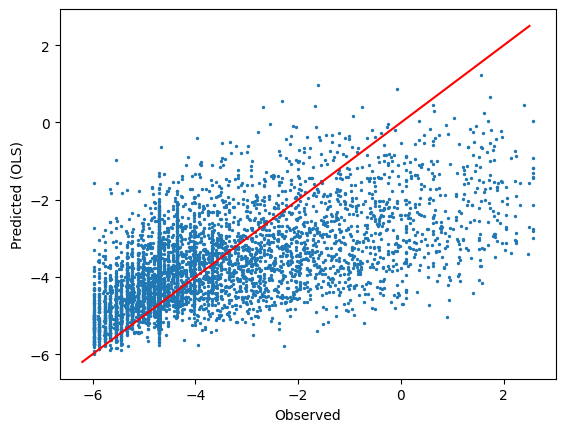

In [18]:
import matplotlib.pyplot as plt

# fit on validation, then plot predicted vs observed
y_smipppy_pred = results.predict(sm.add_constant(X_val.astype(float)))
plt.scatter(y_smipppy_val, y_smipppy_pred, s=2)
plt.xlabel('Observed')
plt.ylabel('Predicted (OLS)')
plt.plot([-6.2, 2.5], [-6.2, 2.5],color = 'r')

Quadratic terms (interaction terms)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
# interaction terms only
poly = PolynomialFeatures(2, interaction_only=True)
X_trainQ = poly.fit_transform(X_train)
X_valQ = poly.fit_transform(X_val)
# very high dimensions (computationally expensive)
X_trainQ.shape

(21999, 8129)

In [20]:
# add intercept and fit OLS again
lm_2 = OLS(y_smipppy_train, sm.add_constant(X_trainQ.astype(float)))
results_2 = lm_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                SMIPPPY   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     4.181
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:39:19   Log-Likelihood:                -30928.
No. Observations:               21999   AIC:                         7.500e+04
Df Residuals:                   15426   BIC:                         1.276e+05
Df Model:                        6572                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7583      4.078     -0.431      0.6

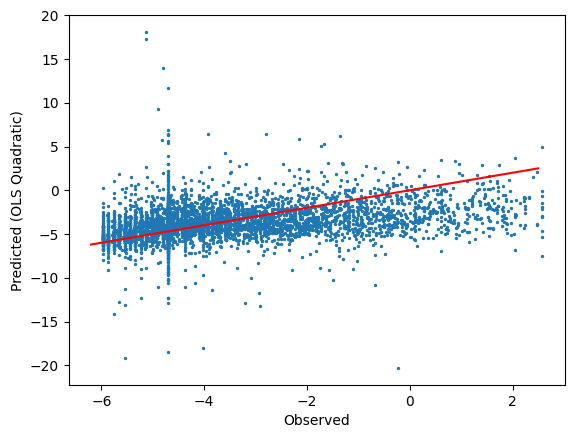

In [21]:
# fit on validation, then plot predicted vs observed
y_smipppy_pred_2 = results_2.predict(sm.add_constant(X_valQ.astype(float)))
plt.scatter(y_smipppy_val, y_smipppy_pred_2, s=2)
plt.xlabel('Observed')
plt.ylabel('Predicted (OLS Quadratic)')
plt.plot([-6.2, 2.5], [-6.2, 2.5],color = 'r')

Regression Decision Trees & Random Forests

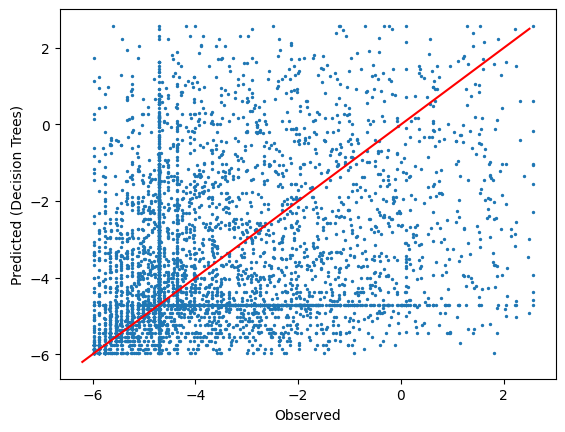

In [22]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr = dtr.fit(X_train, y_smipppy_train)
y_smipppy_pred_3 = dtr.predict(X_val)

plt.scatter(y_smipppy_val, y_smipppy_pred_3, s=2)
plt.xlabel('Observed')
plt.ylabel('Predicted (Decision Trees)')
plt.plot([-6.2, 2.5], [-6.2, 2.5],color = 'r')

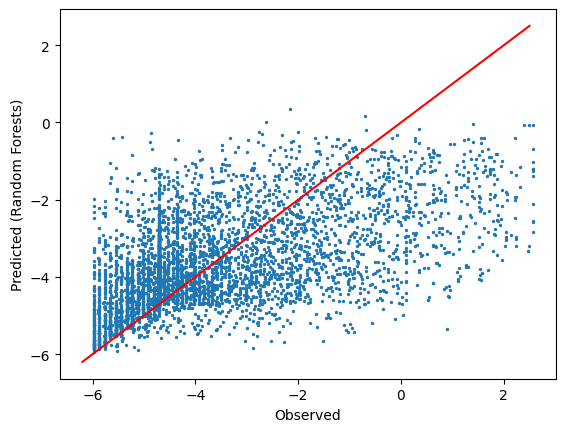

In [23]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42)
rfr = rfr.fit(X_train, y_smipppy_train)
y_smipppy_pred_4 = rfr.predict(X_val)

plt.scatter(y_smipppy_val, y_smipppy_pred_4, s=2)
plt.xlabel('Observed')
plt.ylabel('Predicted (Random Forests)')
plt.plot([-6.2, 2.5], [-6.2, 2.5],color = 'r')

Training the Model: Part 2 with SMIPY

Splitting data into train/val/test sets

In [24]:
from sklearn.model_selection import train_test_split

# split into 0.6/0.2/0.2; stratify for imbalance
X_train, X_val_test, y_smipy_train, y_smipy_val_test = train_test_split(X, y_smipy, test_size=0.4, stratify=y_smipy, random_state=42)
X_val, X_test, y_smipy_val, y_smipy_test = train_test_split(X_val_test, y_smipy_val_test, stratify=y_smipy_val_test,  random_state=42)

Regression Decision Trees & Random Forests

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

dtc = DecisionTreeClassifier(random_state=42)
dtc = dtc.fit(X_train, y_smipy_train)
y_smipy_pred = dtc.predict(X_val)

# using f1 score for class imbalance (seen in distributions.ipynb)
print(f'Decision Tree f1 score: {f1_score(y_smipy_val, y_smipy_pred)}')

Decision Tree f1 score: 0.2953091684434968


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rfc = RandomForestClassifier(class_weight='balanced', random_state=42)
rfc = rfc.fit(X_train, y_smipy_train)
# default prediction threshold is 0.5 - reduce this to catch more positives
y_prob = rfc.predict_proba(X_val)[:, 1]
y_smipy_pred_2 = (y_prob >= 0.2).astype(int)

# using f1 score for class imbalance (seen in distributions.ipynb)
print(f'Random Forest f1 score: {f1_score(y_smipy_val, y_smipy_pred_2)}')

Random Forest f1 score: 0.42484248424842486


Oversampling via SMOTE - Synthetic Minority Over-sampling Technique

In [27]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# SMOTE + Random Forest
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('rfc', RandomForestClassifier(class_weight='balanced', random_state=42))
])

pipeline.fit(X_train, y_smipy_train)
# default prediction threshold is 0.5 - reduce this to catch more positives
y_prob2 = pipeline.predict_proba(X_val)[:, 1]
y_smipy_pred_3 = (y_prob2 >= 0.33).astype(int)

# using f1 score for class imbalance (seen in distributions.ipynb)
print(f'Random Forest + SMOTE f1 score: {f1_score(y_smipy_val, y_smipy_pred_3)}')

Random Forest + SMOTE f1 score: 0.4526226734348562


In [28]:
from imblearn.over_sampling import BorderlineSMOTE

# SMOTE + Random Forest
pipeline2 = Pipeline(steps=[
    ('borderlinesmote', BorderlineSMOTE(random_state=42)),
    ('rfc', RandomForestClassifier(class_weight='balanced', random_state=42))
])

pipeline2.fit(X_train, y_smipy_train)
# default prediction threshold is 0.5 - reduce this to catch more positives
y_prob3 = pipeline2.predict_proba(X_val)[:, 1]
y_smipy_pred_4 = (y_prob3 >= 0.35).astype(int)

# using f1 score for class imbalance (seen in distributions.ipynb)
print(f'Random Forest + bSMOTE f1 score: {f1_score(y_smipy_val, y_smipy_pred_4)}')

Random Forest + bSMOTE f1 score: 0.4535169699950812


In [29]:
from imblearn.combine import SMOTEENN

# SMOTE + Random Forest
pipeline3 = Pipeline(steps=[
    ('smoteeenn', SMOTEENN(random_state=42)),
    ('rfc', RandomForestClassifier(class_weight='balanced', random_state=42))
])

pipeline3.fit(X_train, y_smipy_train)
# default prediction threshold is 0.5 - reduce this to catch more positives
y_prob4 = pipeline3.predict_proba(X_val)[:, 1]
y_smipy_pred_5 = (y_prob4 >= 0.65).astype(int)

# using f1 score for class imbalance (seen in distributions.ipynb)
print(f'Random Forest + SMOTEENN f1 score: {f1_score(y_smipy_val, y_smipy_pred_5)}')

Random Forest + SMOTEENN f1 score: 0.4407252440725244


In [30]:
from imblearn.ensemble import BalancedBaggingClassifier

bbc = BalancedBaggingClassifier(estimator=RandomForestClassifier(), random_state=42)

bbc.fit(X_train, y_smipy_train)
# default prediction threshold is 0.5 - reduce this to catch more positives
y_prob6 = bbc.predict_proba(X_val)[:, 1]
y_smipy_pred_7 = (y_prob6 >= 0.62).astype(int)
print(f'Random Forest + balanced bagging f1 score: {f1_score(y_smipy_val, y_smipy_pred_7)}')

Random Forest + balanced bagging f1 score: 0.45895691609977324


Gradient-boosted Trees with SMOTE

In [31]:
import xgboost as xgb
from xgboost import XGBClassifier

# compute the imbalance ratio on training set
n_neg = (y_smipy_train == 0).sum()
n_pos = (y_smipy_train == 1).sum()
scale = n_neg / n_pos

pipeline4 = Pipeline(steps=[
    ('borderlinesmote', BorderlineSMOTE(random_state=42)),
    ('xgb_clf', XGBClassifier(scale_pos_weight=scale, eval_metric='auc', random_state=42))
])

pipeline4.fit(X_train, y_smipy_train)
# default prediction threshold is 0.5 - reduce this to catch more positives
y_prob5 = pipeline4.predict_proba(X_val)[:, 1]
y_smipy_pred_6 = (y_prob5 >= 0.65).astype(int)

# using f1 score for class imbalance (seen in distributions.ipynb)
print(f'Random Forest + xgboost f1 score: {f1_score(y_smipy_val, y_smipy_pred_6)}')

Random Forest + xgboost f1 score: 0.3914458391445839


Hyperparameter tuning with Optuna - balanced bagging

In [32]:
# using optuna to tune hyperparameters
import optuna
from sklearn.model_selection import cross_val_score

# Define an objective function to be maximized.
def objective(trial):
    # hyperparameters to test: max_features, n_estimators, min_samples_leaf, criterion
    rfc_max_features = trial.suggest_categorical('rfc_max_features', ['sqrt', 'log2', None])
    rfc_n_estimators = trial.suggest_int('rfc_n_estimators', 20, 500, step = 20)
    rfc_min_samples_leaf = trial.suggest_categorical('rfc_min_samples_leaf', [1,2,5,10,20])
    rfc_criterion = trial.suggest_categorical('rfc_criterion', ['entropy', 'gini'])
    rfc = RandomForestClassifier(max_features=rfc_max_features, n_estimators=rfc_n_estimators, 
                                        min_samples_leaf=rfc_min_samples_leaf, criterion=rfc_criterion, random_state=42)
    sampling_strategy = trial.suggest_float('sampling_strategy', 0.5, 1.0)
    bbc = BalancedBaggingClassifier(estimator=rfc, random_state=42, sampling_strategy=sampling_strategy)

    return cross_val_score(bbc, X_train, y_smipy_train, scoring='f1', cv=5).mean()

# maximize objective
study = optuna.create_study(study_name="study", direction='maximize')  
study.optimize(objective, n_trials=20)  

[I 2025-04-18 19:40:08,990] A new study created in memory with name: study
[I 2025-04-18 19:40:16,930] Trial 0 finished with value: 0.4063317429039186 and parameters: {'rfc_max_features': 'sqrt', 'rfc_n_estimators': 60, 'rfc_min_samples_leaf': 20, 'rfc_criterion': 'gini', 'sampling_strategy': 0.7753361716925773}. Best is trial 0 with value: 0.4063317429039186.
[I 2025-04-18 19:40:28,402] Trial 1 finished with value: 0.4037219233569881 and parameters: {'rfc_max_features': 'log2', 'rfc_n_estimators': 80, 'rfc_min_samples_leaf': 2, 'rfc_criterion': 'entropy', 'sampling_strategy': 0.9491678461691767}. Best is trial 0 with value: 0.4063317429039186.
[I 2025-04-18 19:40:35,676] Trial 2 finished with value: 0.43454565918819466 and parameters: {'rfc_max_features': 'sqrt', 'rfc_n_estimators': 40, 'rfc_min_samples_leaf': 5, 'rfc_criterion': 'gini', 'sampling_strategy': 0.6256753257026981}. Best is trial 2 with value: 0.43454565918819466.
[I 2025-04-18 19:41:34,096] Trial 3 finished with value: 0

Final evaluation on the test set

In [41]:
rfc_final = RandomForestClassifier(max_features='sqrt', n_estimators=500, min_samples_leaf=1, criterion='entropy') 
bbc_final = BalancedBaggingClassifier(estimator=rfc_final, sampling_strategy=0.5009981908599874, random_state=42)

bbc_final.fit(X_train, y_smipy_train)
# default prediction threshold is 0.5 - reduce this to catch more positives
y_prob_val = bbc_final.predict_proba(X_val)[:, 1]
y_smipy_pred_val = (y_prob_val >= 0.5).astype(int)
print(f'Random Forest + balanced bagging f1 score: {f1_score(y_smipy_val, y_smipy_pred_val)}')

Random Forest + balanced bagging f1 score: 0.45332050048123196


In [42]:
y_prob_test = bbc_final.predict_proba(X_test)[:, 1]
y_smipy_pred_test = (y_prob_test >= 0.5).astype(int)
print(f'Random Forest + balanced bagging f1 score on test set: {f1_score(y_smipy_test, y_smipy_pred_test)}')

Random Forest + balanced bagging f1 score on test set: 0.46418338108882523


Neural Networks


In [35]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

# find class weights
counts = y_smipy.value_counts()
# inverse frequency to give more weight to minority class
class_weights = torch.tensor([1.0/counts[0], 1.0/counts[1]], dtype=torch.float32)

# convert data to PyTorch tensors, use torch.long for classification
X_train_tensor = torch.tensor(X_train.to_numpy().astype(np.float32), dtype=torch.float32)
y_train_tensor = torch.tensor(y_smipy_train.to_numpy().astype(np.float32), dtype=torch.long) 
X_val_tensor = torch.tensor(X_val.to_numpy().astype(np.float32), dtype=torch.float32)
y_val_tensor = torch.tensor(y_smipy_val.to_numpy().astype(np.float32), dtype=torch.long)
X_test_tensor = torch.tensor(X_test.to_numpy().astype(np.float32), dtype=torch.float32)
y_test_tensor = torch.tensor(y_smipy_test.to_numpy().astype(np.float32), dtype=torch.long)


In [36]:
# create TensorDataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [37]:
# define neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        # first layer
        self.fc1 = nn.Linear(input_size, 32)   
        # second layer
        self.fc2 = nn.Linear(32, 64)           
        # third layer
        self.fc3 = nn.Linear(64, 32)          
        # output layer
        self.fc4 = nn.Linear(32, num_classes)  
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x)) 
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# initialize model
input_size = X_train.shape[1]  # number of features
num_classes = len(np.unique(y_smipy_train))  # number of classes
model = SimpleNN(input_size, num_classes)


In [38]:

# define loss function and optimizer
criterion = nn.CrossEntropyLoss(weight = class_weights)  
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  


In [39]:
import matplotlib.pyplot as plt

# train model
def training(num_epochs):
    num_epochs = num_epochs 
    losses = []
    f1_scores = []

    for epoch in range(num_epochs):
        # set model to training mode
        model.train()  
        running_loss = 0.0
        
        for inputs, labels in train_loader:
            # reset gradient
            optimizer.zero_grad()  
            # forward pass
            outputs = model(inputs) 
            loss = criterion(outputs, labels) 
            # backward propagation
            loss.backward() 
            # update weights
            optimizer.step()  
            
            running_loss += loss.item()
        
        loss = running_loss/len(train_loader)
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss:.4f}')
        losses.append(loss)

        # evaluate model: set to evaluation mode
        model.eval()  
        with torch.no_grad():  
            correct = 0
            total = 0
            all_preds = []
            all_labels = []

            
            for inputs, labels in val_loader:
                outputs = model(inputs)
                # predict
                _, predicted = torch.max(outputs.data, 1) 
                total += labels.size(0)
                # count correct predictions
                correct += (predicted == labels).sum().item() 
                # append all predicted and original labels for f1 score calculation
                all_preds.extend(predicted.numpy())
                all_labels.extend(labels.numpy())

            print(f'Accuracy of the model on the val set: {100 * correct / total:.2f}%')
            f1 = f1_score(all_labels, all_preds)
            print(f'F1 score on val set: {f1:.4f}')
            f1_scores.append(f1)

    # plot losses and f1 scores against epoch
    fig, axs = plt.subplots(1, 2, figsize=(12,6))
    axs[0].plot(range(num_epochs), losses)
    axs[0].set_title('Loss')
    axs[1].plot(range(num_epochs), f1_scores)
    axs[1].set_title('F1')


Epoch [1/30], Loss: 0.6156
Accuracy of the model on the val set: 80.22%
F1 score on val set: 0.3822
Epoch [2/30], Loss: 0.5113
Accuracy of the model on the val set: 76.42%
F1 score on val set: 0.3617
Epoch [3/30], Loss: 0.4848
Accuracy of the model on the val set: 79.35%
F1 score on val set: 0.3844
Epoch [4/30], Loss: 0.4753
Accuracy of the model on the val set: 81.98%
F1 score on val set: 0.4016
Epoch [5/30], Loss: 0.4732
Accuracy of the model on the val set: 80.12%
F1 score on val set: 0.3876
Epoch [6/30], Loss: 0.4639
Accuracy of the model on the val set: 76.55%
F1 score on val set: 0.3602
Epoch [7/30], Loss: 0.4644
Accuracy of the model on the val set: 77.46%
F1 score on val set: 0.3707
Epoch [8/30], Loss: 0.4591
Accuracy of the model on the val set: 77.77%
F1 score on val set: 0.3732
Epoch [9/30], Loss: 0.4606
Accuracy of the model on the val set: 79.30%
F1 score on val set: 0.3851
Epoch [10/30], Loss: 0.4582
Accuracy of the model on the val set: 78.74%
F1 score on val set: 0.3798

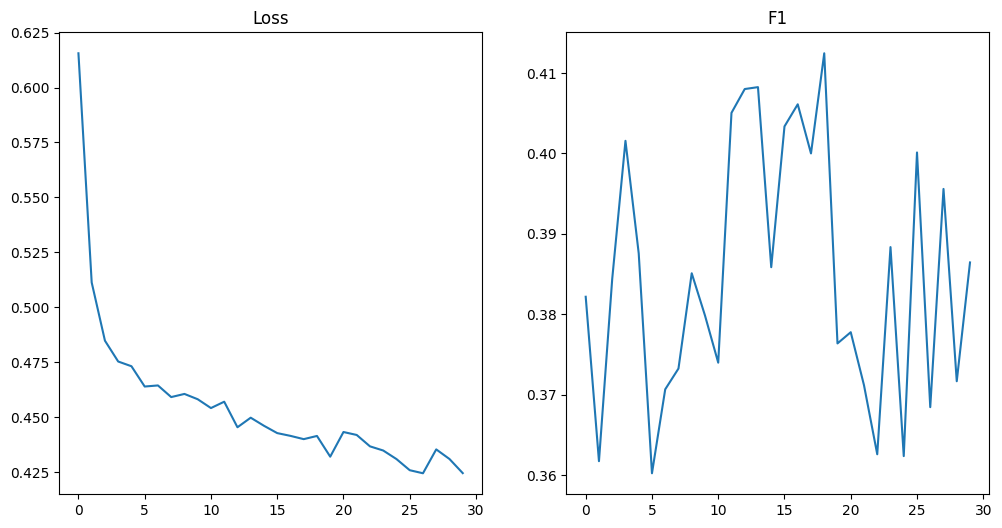

In [40]:
training(30)